In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Read Data.

In [122]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
mpl.rcParams['figure.figsize'] = (15, 7)
mpl.rcParams['axes.grid'] = False

In [87]:
mpl.rcParams['figure.figsize'] = (20, 7)
mpl.rcParams['axes.grid'] = False

In [88]:
df_count=pd.read_csv('./dataset/final_sunspot_count_data.csv')
df_size=pd.read_csv('./dataset/final_sunspot_size_data.csv')
df_count['count'] = df_count['count'].replace(-1.0, 0)
df_size['Total'] = df_size['Total'].replace(-1.0, 0)

df_count['date'] = pd.to_datetime(df_count["date"]).dt.to_period('M').astype(str)
df_size['date'] = pd.to_datetime(df_size['date']).dt.to_period('M').astype(str)

df_count_sum = df_count.groupby('date', as_index=False)['count'].mean()
df_size_sum = df_size.groupby('date', as_index=False)['Total'].mean()

merged_df = pd.merge(df_count_sum, df_size_sum, on='date', how='inner')
merged_df['date'] = pd.to_datetime(merged_df['date']).dt.to_period('M').dt.to_timestamp()

In [89]:
merged_df.to_csv("./dataset/merged.csv")

In [90]:
df = merged_df[["date", "count"]]
df.head()

date       count
0 1874-05-01   74.580645
1 1874-06-01   63.766667
2 1874-07-01  113.225806
3 1874-08-01  102.258065
4 1874-09-01   46.833333

In [5]:
df = pd.read_csv("Sunspots.csv")
df.head()

Unnamed: 0        Date  Monthly Mean Total Sunspot Number
0           0  1749-01-31                               96.7
1           1  1749-02-28                              104.3
2           2  1749-03-31                              116.7
3           3  1749-04-30                               92.8
4           4  1749-05-31                              141.7

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1710 entries, 0 to 1709
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1710 non-null   object 
 1   count   1710 non-null   float64
dtypes: float64(1), object(1)
memory usage: 26.8+ KB


We can see from info, Date column is stored as object i.e. string data type . Date column must be converted into datatime format which makes it easier for working with date and time data.There is an unnecessary column named 'Unnamed :0' which has to be removed.

* df['Date']=pd.to_datetime(df['Date']) <-- can be used to convert a column to into datetime data type column
* pd.drop can be used for dropping the unnnecesary column
* Here, I am using 'usecols' argument inside pd.read_csv for selecting only required column.
* 'parse_date', & 'date_parser' arguments for converting Date column into datetime data type.
* inside 'parse_data, we have to pass the column to be conveted into datetime, here, it is 'Date' column.
* 'dateparse' function below is requied which is basically converting any argument passed to it into datetime data type . This is given to * 'data_parser' inside pd.read_csv.
* check the documentation of pd.read_csv, there are more than 15 arguments, which can be used to perform many operations while importing the data itself.

In [11]:
from dateutil.parser import parse
dateparse=lambda dates:parse(dates)

In [9]:
df = pd.read_csv('Sunspots.csv',usecols=['Date','Monthly Mean Total Sunspot Number'],parse_dates=['Date'],date_parser=dateparse)
df.head()

/tmp/ipykernel_681354/2075644693.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv('Sunspots.csv',usecols=['Date','Monthly Mean Total Sunspot Number'],parse_dates=['Date'],date_parser=dateparse)


Date  Monthly Mean Total Sunspot Number
0 1749-01-31                               96.7
1 1749-02-28                              104.3
2 1749-03-31                              116.7
3 1749-04-30                               92.8
4 1749-05-31                              141.7

In [10]:
df.info() ## Checking the info again : data type of Date column --> has conveted into datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252 entries, 0 to 3251
Data columns (total 2 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Date                               3252 non-null   datetime64[ns]
 1   Monthly Mean Total Sunspot Number  3252 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 50.9 KB


# 1. Exploratory Data Analysis

In [22]:
df_copy=df.copy() # Making a copy of initial data.Both will be used as required
# The 'df_non_index' dataframe is used for some exploratory data analysis  
# Later we will convert Date colum as index in  'df' dataframe.

## Profit of datetime formated data:

* You can do lot of date and time related operations easily without doing string opeations.
* Here month is seprated and kept in another column named month so easily
* Afeter that year is seperated and used.

In [84]:
len(df_copy)

1710

In [23]:
df_copy.date

0      1874-05-01
1      1874-06-01
2      1874-07-01
3      1874-08-01
4      1874-09-01
          ...    
1705   2016-06-01
1706   2016-07-01
1707   2016-08-01
1708   2016-09-01
1709   2016-10-01
Name: date, Length: 1710, dtype: datetime64[ns]

In [24]:
df_copy['Month']=df_copy.date.dt.month
df_copy.head()

date       count  Month
0 1874-05-01   74.580645      5
1 1874-06-01   63.766667      6
2 1874-07-01  113.225806      7
3 1874-08-01  102.258065      8
4 1874-09-01   46.833333      9

* The following code is extracting the each year of the decade, for example in string '1749' last character i.e. (3rd positional) is year 9 of that decade, which has been extracded and kept in another column named 'nth_year.
* for '1748' it wil be year 8.
* But for '1750' it will be year '0' which has to be 10. Thus .replace('0','10') is applied and finally converted back into intger by type casting.

In [26]:
df_copy['nth_year'] =[int(str(i)[3]) for i in (df_copy.date.dt.year)] # Note this is list comprehension 
df_copy['nth_year'].replace(0,10,inplace=True)
df_copy.head(10)

date       count  Month  nth_year
0 1874-05-01   74.580645      5         4
1 1874-06-01   63.766667      6         4
2 1874-07-01  113.225806      7         4
3 1874-08-01  102.258065      8         4
4 1874-09-01   46.833333      9         4
5 1874-10-01   57.419355     10         4
6 1874-11-01   48.200000     11         4
7 1874-12-01   48.774194     12         4
8 1875-01-01   24.419355      1         5
9 1875-02-01   35.857143      2         5

## Plotting the data using seaborn boxplot

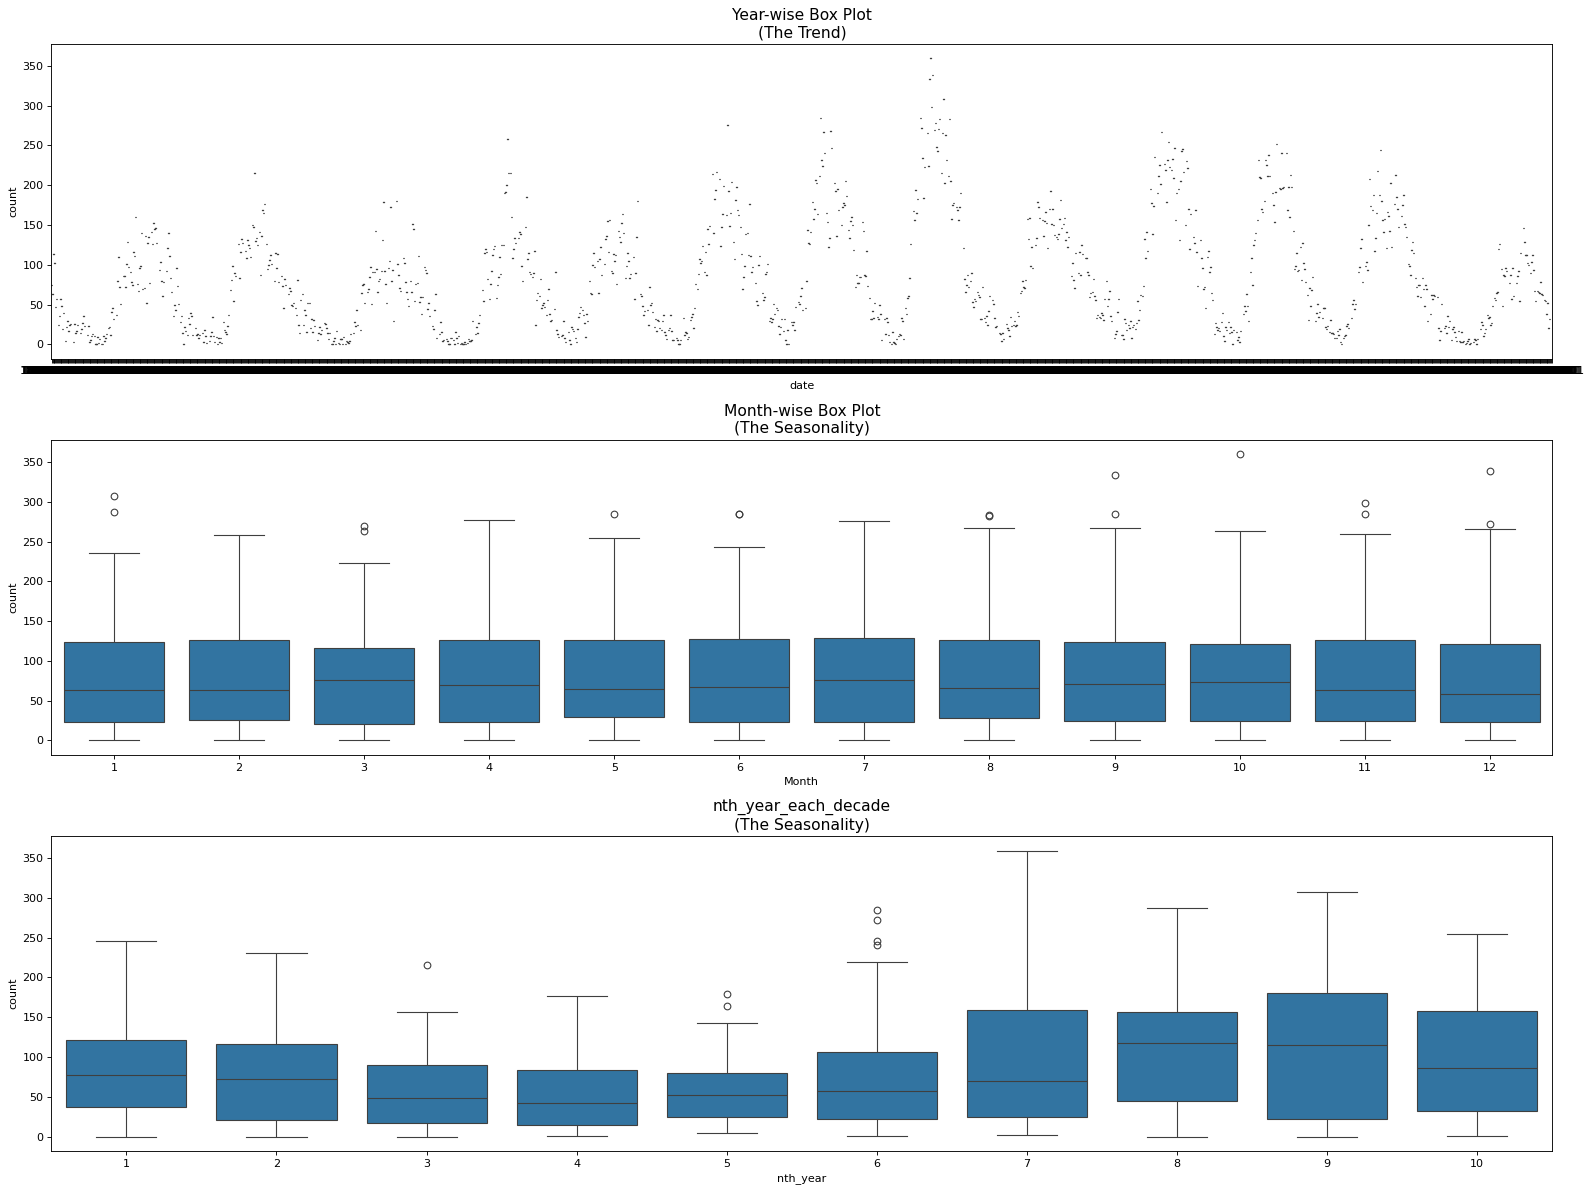

In [27]:
fig, axes = plt.subplots(3, 1, figsize=(20,15), dpi= 80)
sns.boxplot(x='date', y='count', data=df_copy, ax=axes[0])
sns.boxplot(x='Month', y='count', data=df_copy,ax = axes[1])
sns.boxplot(x='nth_year', y='count', data=df_copy,ax = axes[2])
# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=14); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=14)
axes[2].set_title('nth_year_each_decade\n(The Seasonality)', fontsize=14)
fig.tight_layout()
plt.show()

## Eplanation of above plot:

* The distribution of data is almost same in each month with few outliers
* The distribution of data among each year of the decades are not same .
## Returing back to dataframe 'df' and Making Date column as index

* Once we make Date column as index,it is very easy to slice the data based on index (i.e. date) and even plotting in pandas with datetime column as index is easy.

In [29]:
df = df.set_index('date')
df.head()

count
date                  
1874-05-01   74.580645
1874-06-01   63.766667
1874-07-01  113.225806
1874-08-01  102.258065
1874-09-01   46.833333

In [30]:
df.tail()

count
date                 
2016-06-01  20.533333
2016-07-01  32.354839
2016-08-01  50.161290
2016-09-01  44.633333
2016-10-01  33.419355

<Axes: xlabel='date'>

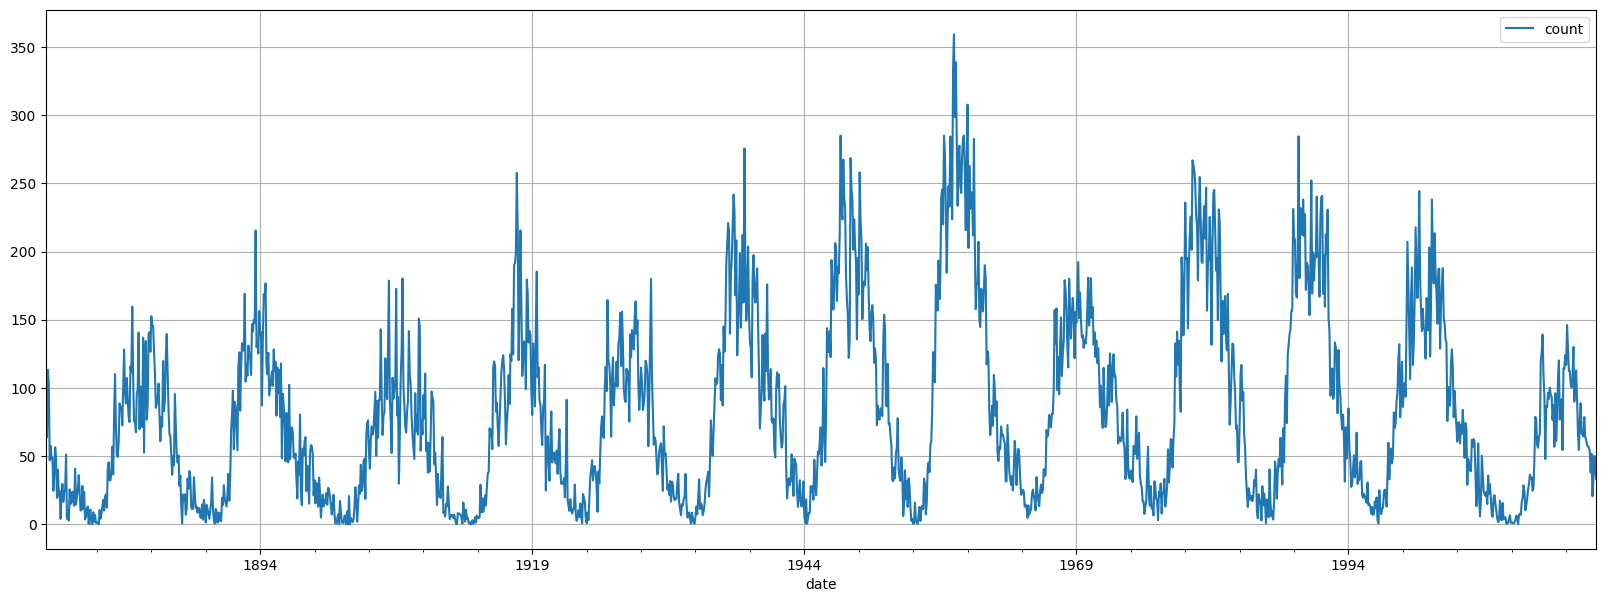

In [31]:
df.plot(grid=True) # plots in pandas itself take index as x axis, here it is datetime and y axis is  'Monthly Mean Total Sunspot Number'
#  This plot is same to that of previous first box plot (that was a scatter plot, here it dots are joined )

## The data is too to large to see it in a one graph, there are 3235 monthly entries from date 1749-01-31 to 2018-07-31.

* One way to slice the data and visualise any particular time zone.
* Plotly express provide slider and button to select particular time zone.
* Checking both:

<Axes: xlabel='date'>

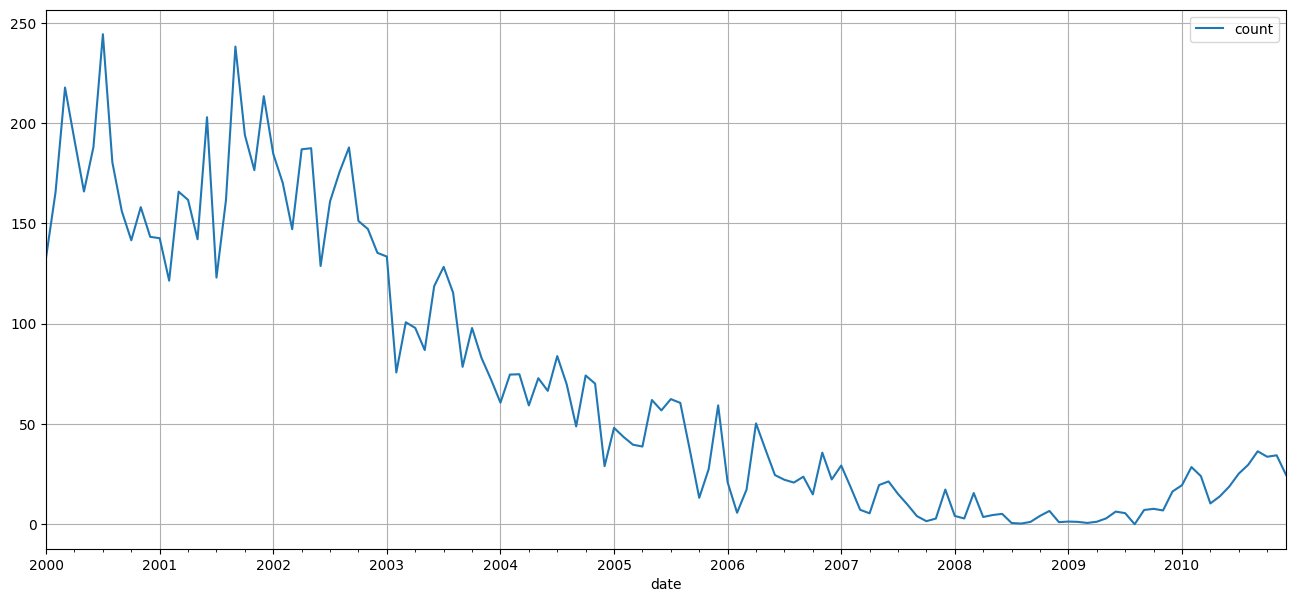

In [32]:
df_2018=df.loc['2000':'2010'] # Slicing all data from 2000 to 2010
df_2018.plot(figsize=(16,7),grid=True)

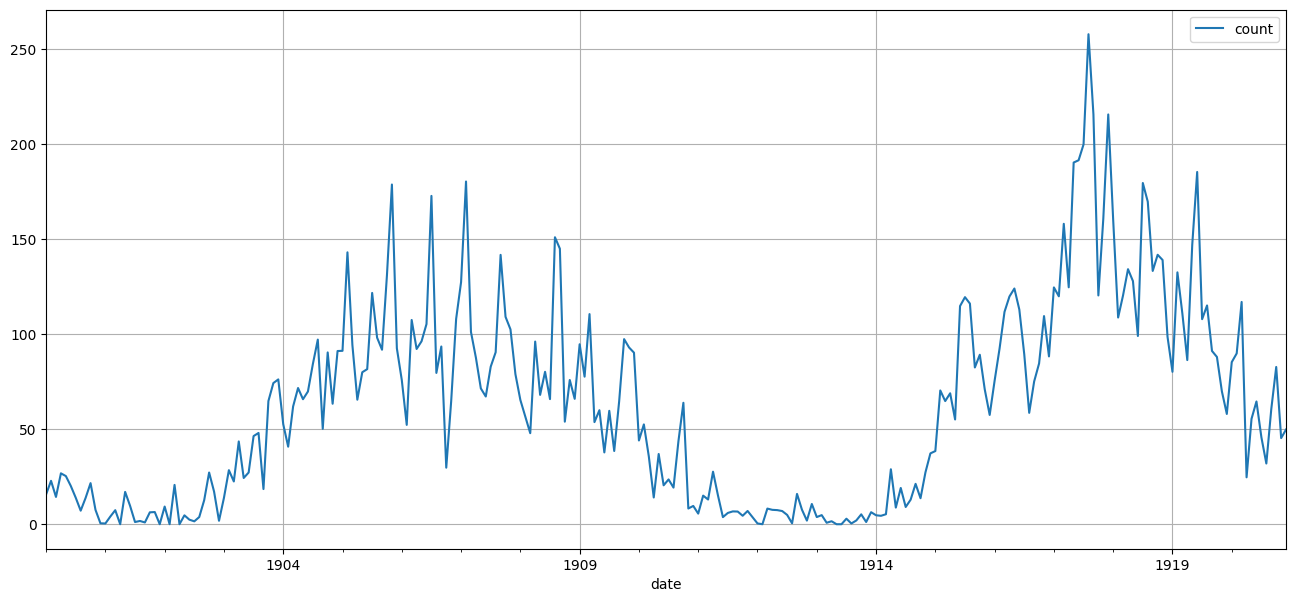

In [33]:
df_2018=df.loc['1900':'1920'] # Slicing all data from 1900 to 1910
df_2018.plot(figsize=(16,7),grid=True)
plt.show()

## plotly express

In [34]:
import plotly.express as px  
fig = px.line(df_copy, x='date', y='count', title='Mean_Sunspot_Slider')
fig.update_xaxes(rangeslider_visible=False)
fig.show()
## There is slider belwo the graph using which we can select any particular time zone

## Buttons options in plotly

In [35]:
fig = px.line(df_copy, x='date', y='count', title='Mean_Sunspot_Slider')

fig.update_xaxes(
    rangeslider_visible=False,
    rangeselector=dict(
        buttons=list([
            dict(count=10, label="10y", step="year", stepmode="backward"),
            dict(count=20, label="20y", step="year", stepmode="backward"),
            dict(count=30, label="30y", step="year", stepmode="backward"),
            dict(count=40, label="40y", step="year", stepmode="backward"),
            dict(count=50, label="50y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [36]:
df_copy.head()

date       count  Month  nth_year
0 1874-05-01   74.580645      5         4
1 1874-06-01   63.766667      6         4
2 1874-07-01  113.225806      7         4
3 1874-08-01  102.258065      8         4
4 1874-09-01   46.833333      9         4

## Comparison of two consecutive 11 year: How to choose from where to where?
* In above graph we can see the pattern is repeating after 11 year approx, choose the time to match any two reapeated pattern

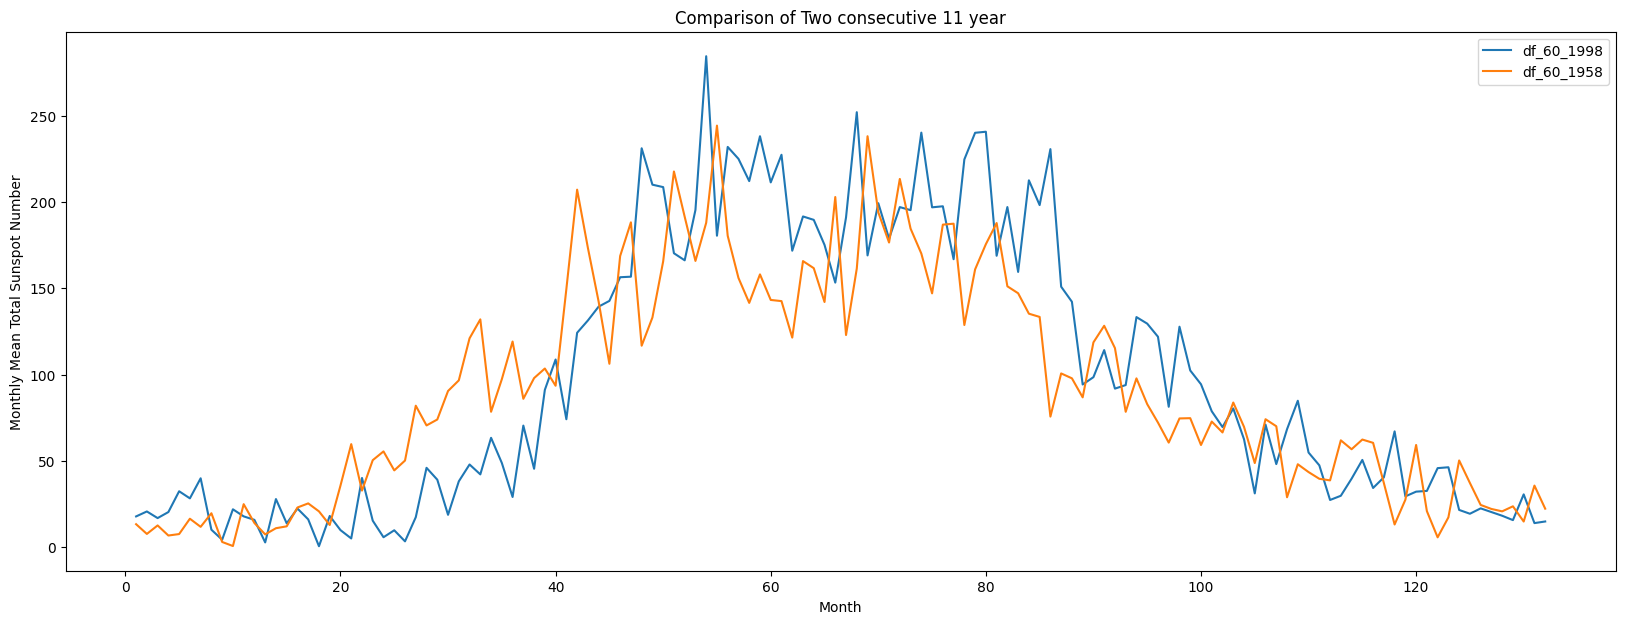

In [38]:
df_11_1985=df_copy[(df_copy.date.dt.year>=1985) & (df_copy.date.dt.year<1996)]
df_11_1996=df_copy[(df_copy.date.dt.year>=1996) &(df_copy.date.dt.year<2007)]

x=np.arange(1,len(df_11_1996['date'])+1)

plt.plot(x, df_11_1985['count'],label='df_60_1998')
plt.plot(x, df_11_1996['count'],label='df_60_1958')
plt.legend()
plt.xlabel('Month')
plt.ylabel('Monthly Mean Total Sunspot Number')
plt.title('Comparison of Two consecutive 11 year')
plt.show()

## Lag plot

* It helps to understand the autocorrelation lag, visualizing for few, normally lag greater than 4 is not useful.
* As we increase the lag time, the correlation is decresing.
* The data is correlated with its recet time lag upt 4/5 time lag.

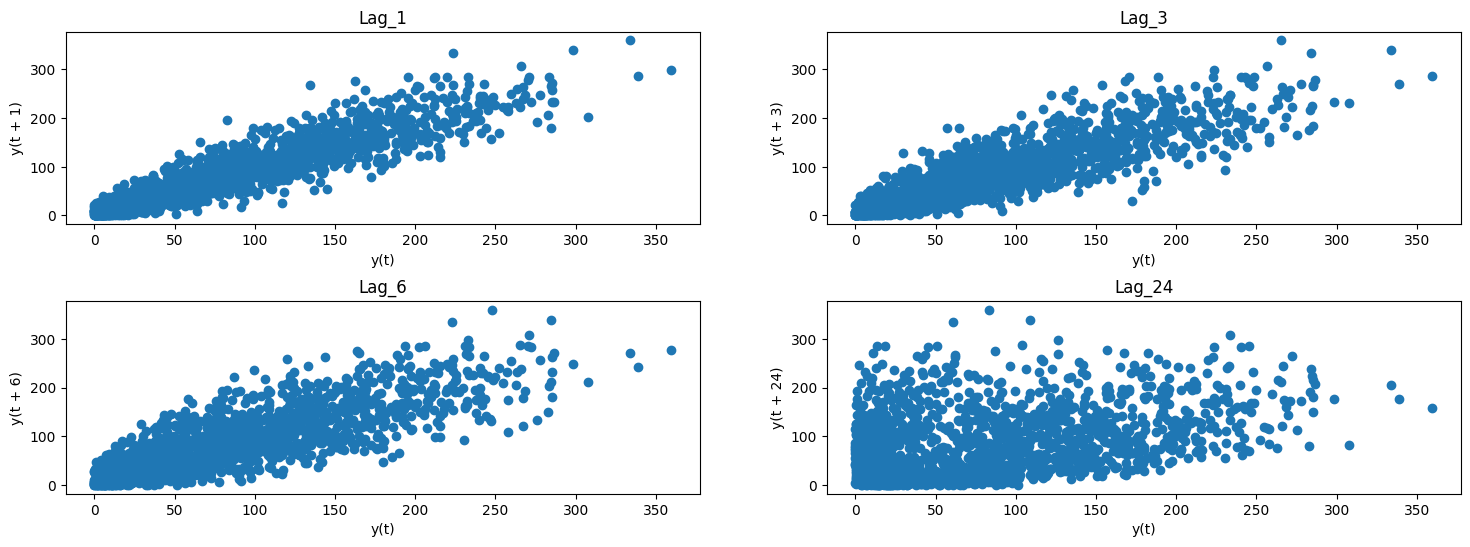

In [39]:
fig=plt.figure(figsize=(18,6))
fig.subplots_adjust(hspace=0.4, wspace=0.2)
ax1=fig.add_subplot(2,2,1)
pd.plotting.lag_plot(df['count'],lag=1)
plt.title('Lag_1')
ax2=fig.add_subplot(2,2,2)
pd.plotting.lag_plot(df['count'],lag=3)
plt.title('Lag_3')
ax3=fig.add_subplot(2,2,3)
pd.plotting.lag_plot(df['count'],lag=6)
plt.title('Lag_6')
ax3=fig.add_subplot(2,2,4)
pd.plotting.lag_plot(df['count'],lag=24)
plt.title('Lag_24')
plt.show()

## Checking the distribution by making histogram and kde plot

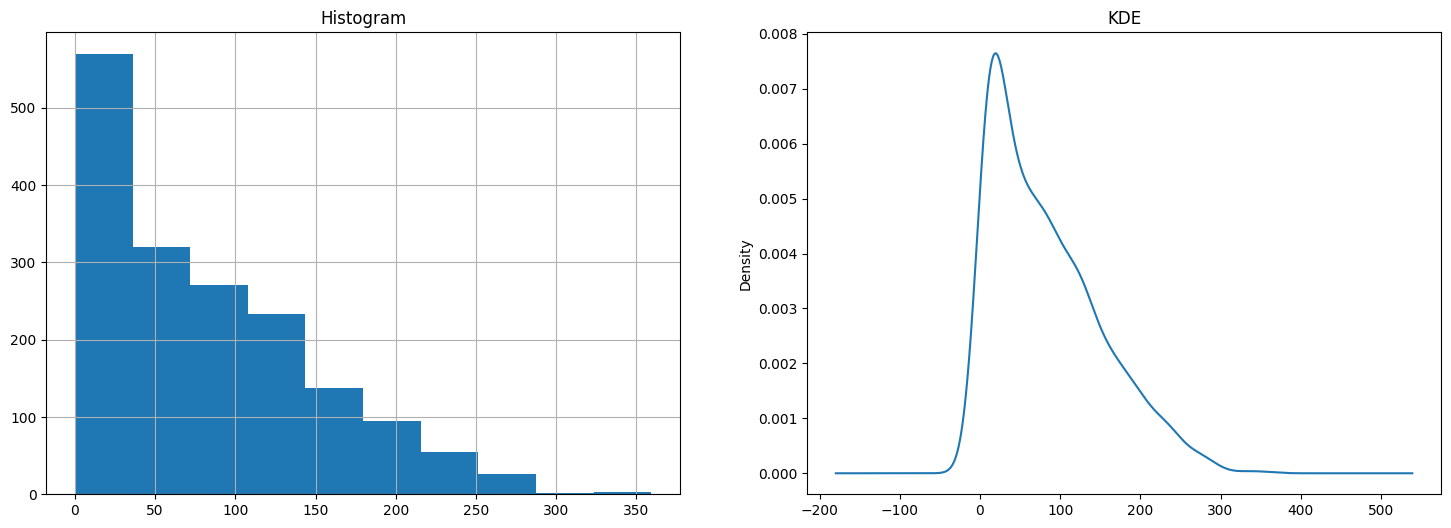

In [40]:
fig=plt.figure(figsize=(18,6))
fig.subplots_adjust(hspace=0.4, wspace=0.2)
ax1=fig.add_subplot(1,2,1)
df['count'].hist()
plt.title('Histogram')
ax2=fig.add_subplot(1,2,2)
df['count'].plot(kind='density')# kernel density plot
plt.title('KDE')
plt.show()

# 2. Checking Stationarity of Time Series Data
* From the plot of data we can see that the it is stationary, though we have to check it statistically. ### Check Stationarity of a Time Series

A TS is said to be stationary if its statistical properties such as mean, variance remain constant over time. But why is it important? Most of the TS models work on the assumption that the TS is stationary. Intuitively, we can state that if a TS has a particular behaviour over time, there is a very high probability that it will follow the same in the future. Also, the theories related to stationary series are more mature and easier to implement as compared to non-stationary series.

Stationarity is defined using very strict criterion. However, for practical purposes we can assume the series to be stationary if it has constant statistical properties over time, ie. the following:

* constant mean (For different time slots)
* constant variance (For different time slots)
* (Rolling mean/variance should be checked and should be constant)
* an autocovariance that does not depend on time
* Two test for stationarity: ADF & KPSS test

https://www.statsmodels.org/stable/examples/notebooks/generated/stationarity_detrending_adf_kpss.html

## Perform Augumented Dickey-Fuller test:
Dickey-Fuller Test: This is one of the statistical tests for checking stationarity. Here the null hypothesis is that the TS is non-stationary. The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary.

* Null Hypothesis - Series is not stationary

* Alternate Hypothesis - Series is stationary

In [41]:
from statsmodels.tsa.stattools import adfuller

In [42]:
data_series=df['count']

In [45]:
print('Results of Dickey-Fuller Test:')
dftest = adfuller(data_series, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)
if dfoutput['Test Statistic'] < dfoutput['Critical Value (5%)']:  ## Comparing with 5% significant Level
  print('Series is stationary')
else:
  print('Series is not Stationary')
## OR 
if dfoutput[1] > 0.05 :
  print('Series is not Stationary')
else:
  print('Series is Stationary')

Results of Dickey-Fuller Test:
Test Statistic                -7.538969e+00
p-value                        3.418199e-11
#Lags Used                     2.500000e+01
Number of Observations Used    1.684000e+03
Critical Value (1%)           -3.434239e+00
Critical Value (5%)           -2.863258e+00
Critical Value (10%)          -2.567685e+00
dtype: float64
Series is stationary
Series is Stationary


## KPSS test for stationary: This another test
* Null hypothesis - Series is stationary
* Alternate hypothesis - Series is not stationary

In [46]:
from statsmodels.tsa.stattools import kpss

In [49]:
stats, p, lags, critical_values = kpss(df['count'], 'c',nlags='legacy')
## pass --> 'ct' if there is trend component in data 
## pass --> 'c' if there is no trend component in data. In this case there is not trend in the data being stationary data.

In [50]:
print(f'Test Statistics: {stats}')
print(f'p-value: {p}')
print(f'Critial Values: {critical_values}')

if p < 0.05 :
  print('Series is not Stationary')
else:
  print('Series is Stationary')

Test Statistics: 0.48746101434914946
p-value: 0.04449076253397535
Critial Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Series is not Stationary


**Note: For Non-Stationary data: First make it stationary**
* Differencing, Taking log and Differencing, Decompostion in components and detrending are few techniques are used.
# 3. Modelling Time Series
**There are many ways to model a time series in order to make predictions.Few are discussed here:**
* Different Moving Averages
* Exponential Smoothing
* ARIMA
* SARIMA
## Rolling Statistics:
We can plot the moving average or moving variance and see if it varies with time. By moving average/variance I mean that at any instant ‘t’, we’ll take the average/variance of the last year, i.e. last 12 months. But again this is more of a visual technique :

**Rolling Average OR Simple moving average = (t + (t-1) + (t-2) + ... + (t-n)) / n**

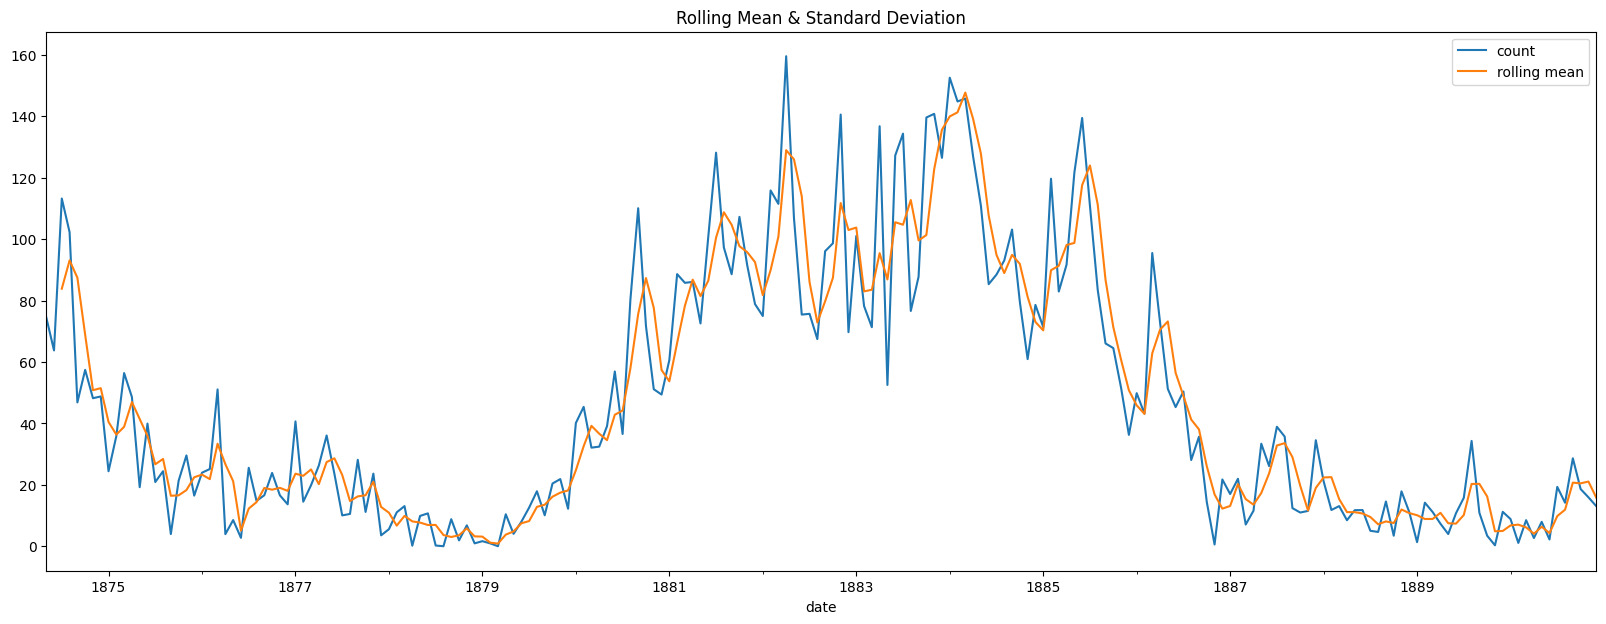

In [52]:
df['count'][:200].plot() # Checking for only first 200 data set
df['count'][:200].rolling(3).mean().plot(label='rolling mean') ## rolling average with 3 time step also known as window
#df['Monthly Mean Total Sunspot Number'][:200].rolling(3).std().plot(label='rolling std')
plt.legend()
plt.title('Rolling Mean & Standard Deviation')
## df['Monthly Mean Total Sunspot Number'].rolling(12).mean().shift(1) # Rolling mean with shift
plt.show()

## Weighted moving average
### Weighted moving average = (tweighting factor) + ((t-1)weighting factor-1) + ((t-n) * weighting factor-n)/n
* This is similar as rolling average except, we multiply with weighting factor so that more weight is given to recent data.
* this function is not availbele, we have to make our own

In [53]:
## Making a function for calculating weighted average which is passed through .apply()
def wma(weights): 
    def calc(x):
        return (weights*x).mean()
    return calc

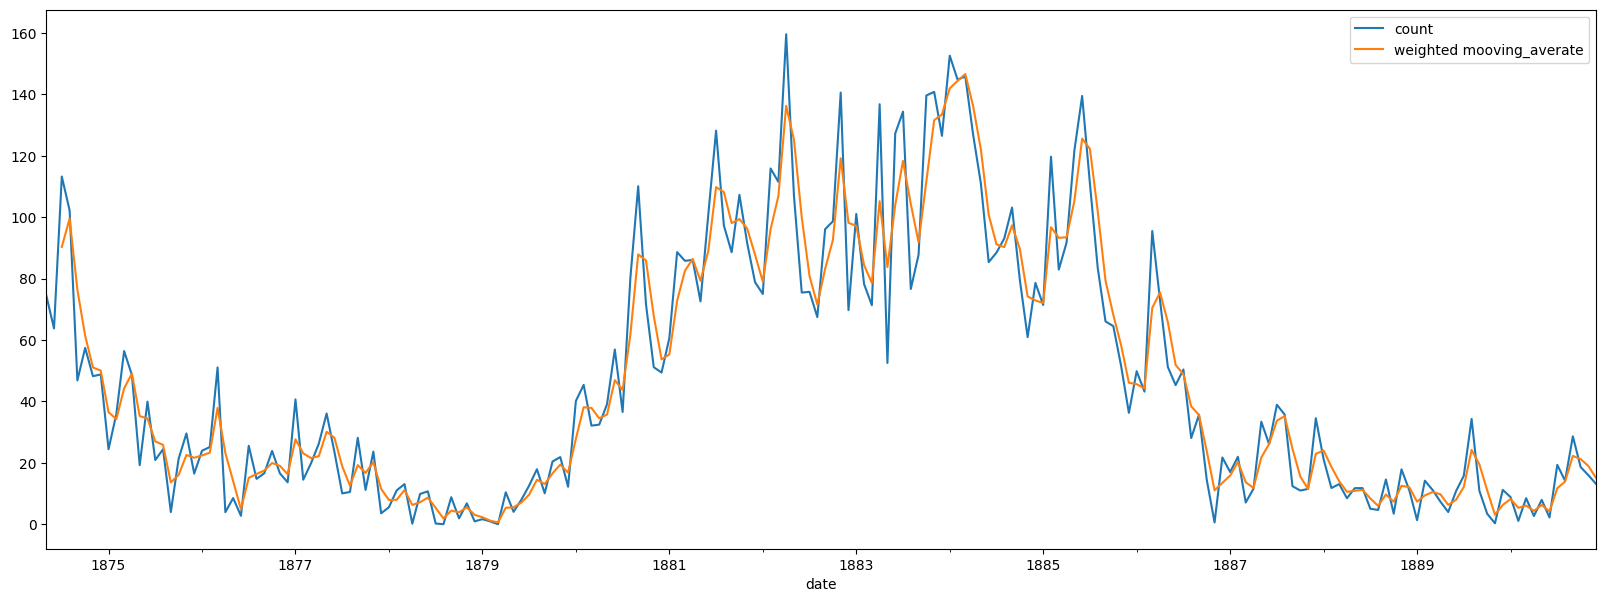

In [54]:
df['count'][:200].plot() # Checking for only first 200 data set
df['count'][:200].rolling(3).apply(wma(np.array([0.5,1,1.5]))).plot(label='weighted mooving_averate')
#  Here inside wma 3 weights are passed since we are taking 3 time step only as window.
plt.legend()
plt.show()

## Exponential moving average\Exponential Smoothing


* https://en.wikipedia.org/wiki/Moving_average#Exponential_moving_average #### * Luckly there is a function for this in pandas.

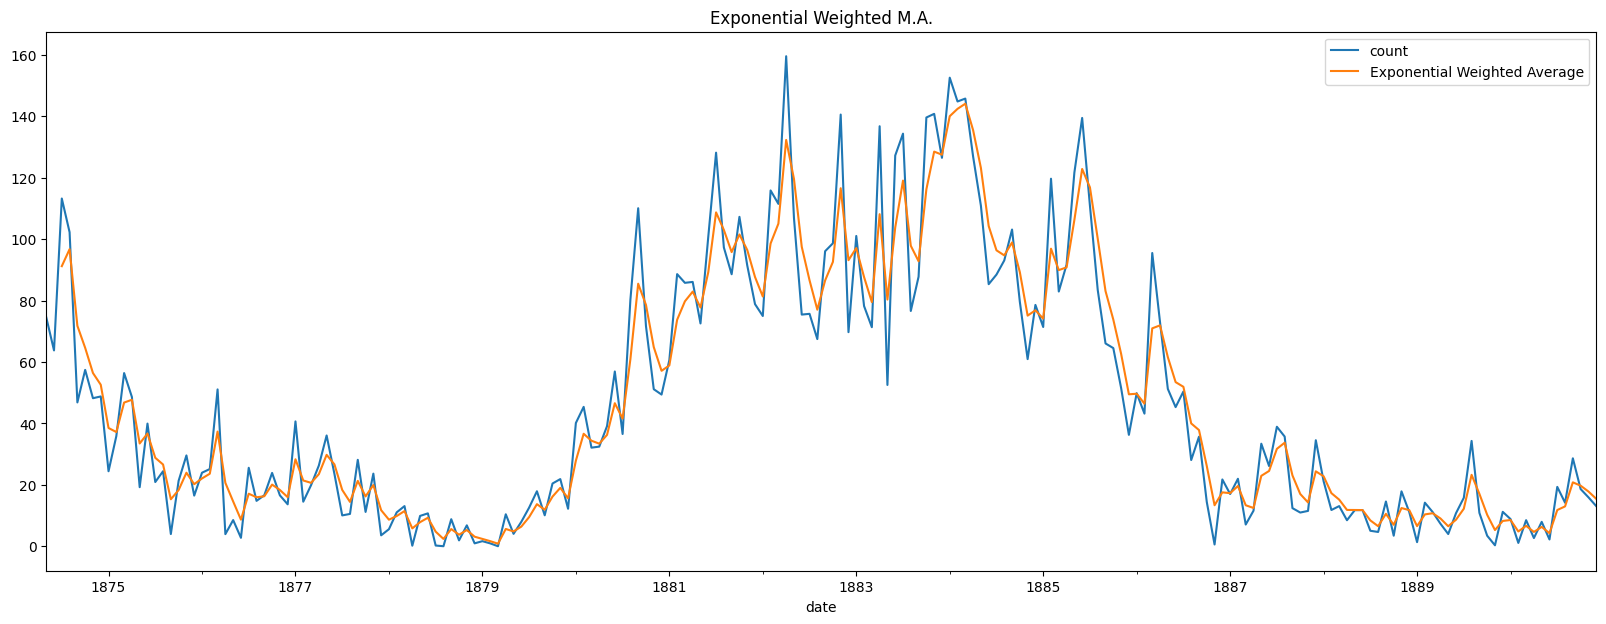

In [55]:
df['count'][:200].plot() # Checking for only first 200 data set
df['count'][:200].ewm(span=3, adjust=False, min_periods=3).mean().plot(label='Exponential Weighted Average')
## Here span=3 is provide thus α=2/(span+1) automatically calculated and applied
## https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html
plt.title('Exponential Weighted M.A.')
plt.legend()
plt.show()

### Providing alpha for Smoothing

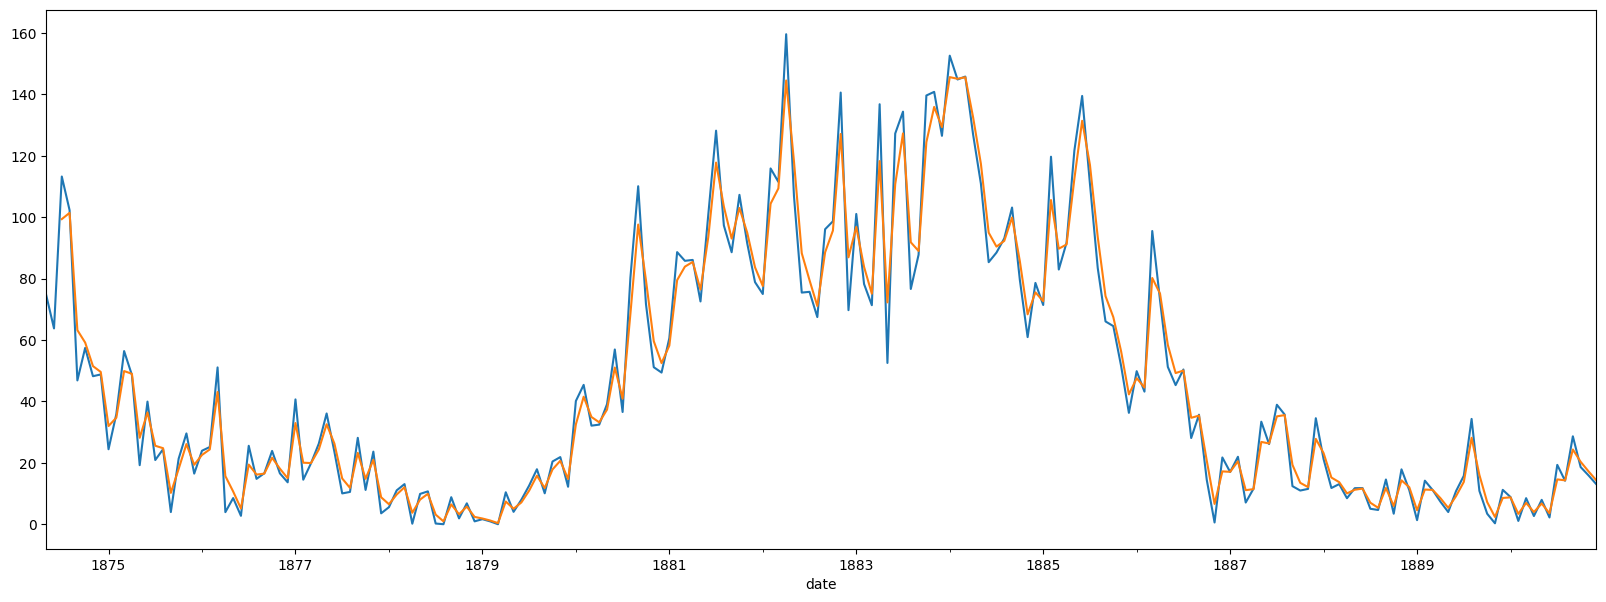

In [56]:
df['count'][:200].plot() # Checking for only first 200 data set
df['count'][:200].ewm(alpha=0.7, adjust=False, min_periods=3).mean().plot(label='Exponential Smooting M A')
plt.show()

### Plotting All together and comparing

                 count  Rolling mean      W_M_A      E_W_A     E_S_M_A
date                                                                  
1874-05-01   74.580645           NaN        NaN  74.580645         NaN
1874-06-01   63.766667           NaN        NaN  69.173656         NaN
1874-07-01  113.225806     83.857706  90.298566  91.199731   99.361323
1874-08-01  102.258065     93.083513  99.498746  96.728898  101.389042
1874-09-01   46.833333     87.439068  76.373656  71.781116   63.200046


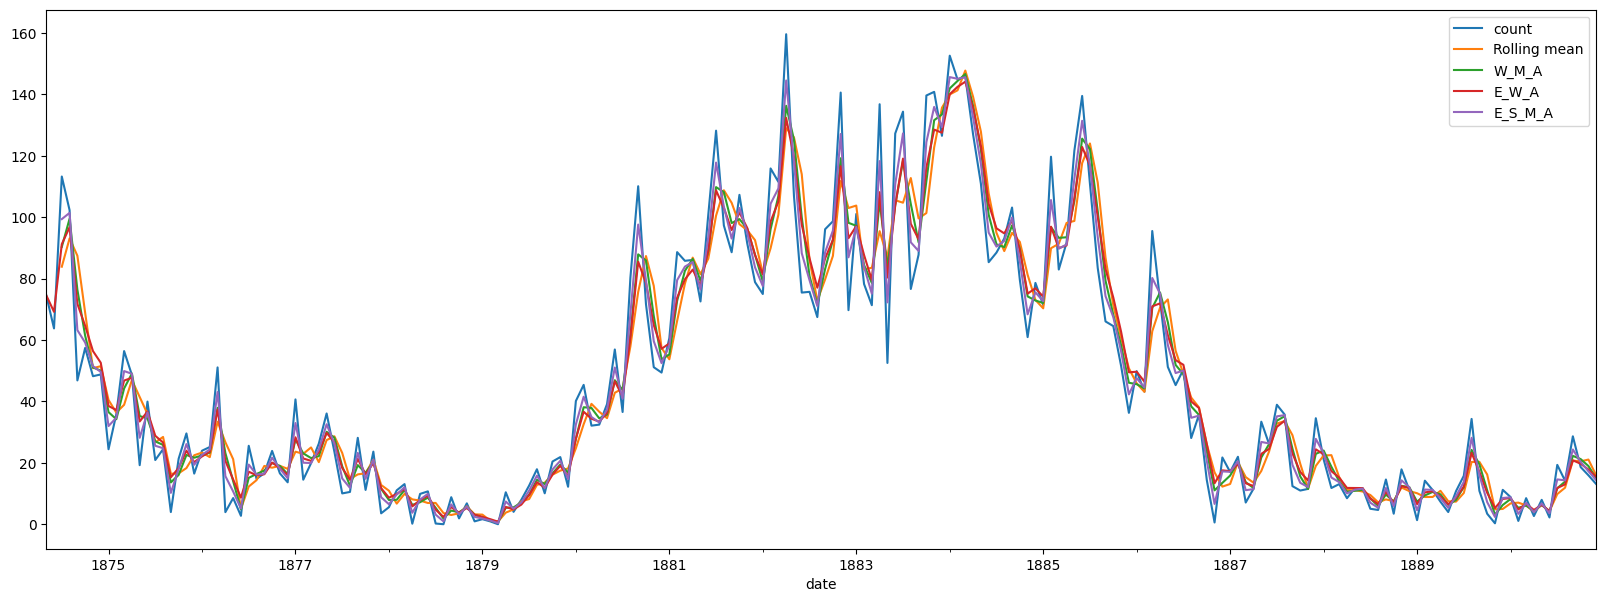

In [57]:
df_with_diff_avg=df[:200].copy()
df_with_diff_avg['Rolling mean']=df['count'][:200].rolling(3).mean()
df_with_diff_avg['W_M_A']= df['count'][:200].rolling(window=3).apply(wma(np.array([0.5,1,1.5])))
df_with_diff_avg['E_W_A']= df['count'][:200].ewm(span=3, adjust=False, min_periods=0).mean()
df_with_diff_avg['E_S_M_A']= df['count'][:200].ewm(alpha=0.7, adjust=False, min_periods=3).mean()
print(df_with_diff_avg.head())
#df_with_diff_avg.set_index('Date', inplace=True)
df_with_diff_avg.plot()
plt.show()

In [58]:
df_with_diff_avg.dropna(inplace=True)

In [59]:
df_with_diff_avg.head()

count  Rolling mean      W_M_A      E_W_A     E_S_M_A
date                                                                  
1874-07-01  113.225806     83.857706  90.298566  91.199731   99.361323
1874-08-01  102.258065     93.083513  99.498746  96.728898  101.389042
1874-09-01   46.833333     87.439068  76.373656  71.781116   63.200046
1874-10-01   57.419355     68.836918  61.363799  64.600235   59.153562
1874-11-01   48.200000     50.817563  51.045341  56.400118   51.486069

### Making a function for comparing RMSE in all above modelling
* We can see exponential smoothing Moving average has lowest RMSE.


In [ ]:
def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [60]:
def RMSE_CAL(df):
      Rolling_Mean_RMSE=np.sqrt(np.sum((df.iloc[:,0]-df.iloc[:,1])**2))
      W_M_A_RMSE=np.sqrt(np.sum((df.iloc[:,0]-df.iloc[:,2])**2))
      E_W_A_RMSE=np.sqrt(np.sum((df.iloc[:,0]-df.iloc[:,3])**2))
      E_S_M_A_RMSE=np.sqrt(np.sum((df.iloc[:,0]-df.iloc[:,4])**2))
      return {"Rolling_Mean_RMSE":Rolling_Mean_RMSE,"W_M_A_RMSE":W_M_A_RMSE,"E_W_A_RMSE":E_W_A_RMSE,"E_S_M_A_RMSE":E_S_M_A_RMSE}
RMSE_CAL(df_with_diff_avg)

{'Rolling_Mean_RMSE': 191.2064279542811,
 'W_M_A_RMSE': 141.3578840278114,
 'E_W_A_RMSE': 136.0963086577151,
 'E_S_M_A_RMSE': 83.5002260869246}

# 4. Decomposing a Time_Series Data

****NOTE: This operation is not required for this data as it is stationary but while working with non-stationary data this step may required.****
* Systematic: Components of the time series that have consistency or reocurrence and can be described and modeled as level,trend, seasonality.
* Non-Systematic: Components of the time series that cannot be directly modeled is noise/residual.
These components are defined as follows:

* Level: The average value in the series.
* Trend: The increasing or decreasing value in the series.
* Seasonality: The repeating short-term cycle in the series.
* Noise: The random variation in the series.
       
       So a time series is thought to be an aggregate or combination of these four components. 
       All series have a level and noise. The trend and seasonality components are optional. 
       It is helpful to think of the components as combining either additively or multiplicatively as given by relation below:

* y(t) = Level + Trend + Seasonality + Noise
* y(t) = Level * Trend * Seasonality * Noise

### Since our data is stationary we will use additive decomposition

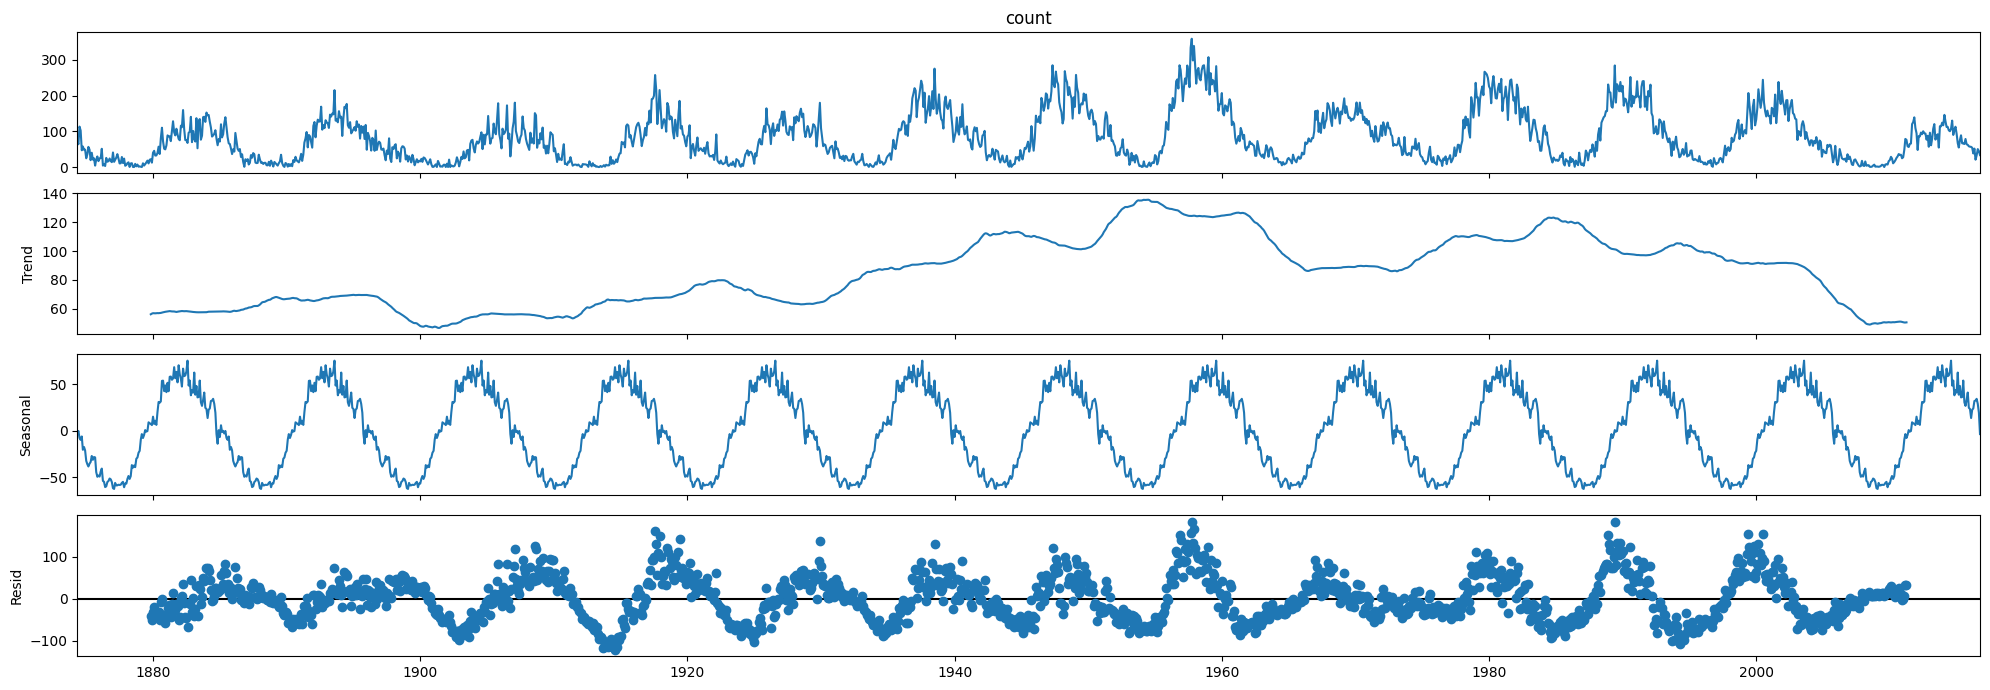

In [61]:
# Additive decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['count'], model="additive",period=11*12) # Data Trend is repeated after every 11 year,freq=11*12
result.plot()
plt.show()

### checking the definition of decompostion for additive nature time series data
* y(t) = Trend + Seasonality + Noise

In [62]:
total_sum=result.trend+result.seasonal+result.resid
total_sum[:100] # compare this result with original Sunspot data 

date
1874-05-01           NaN
1874-06-01           NaN
1874-07-01           NaN
1874-08-01           NaN
1874-09-01           NaN
                 ...    
1882-04-01    159.566667
1882-05-01    106.903226
1882-06-01     75.433333
1882-07-01     75.677419
1882-08-01     67.451613
Length: 100, dtype: float64

In [63]:
df['count'][:100]

date
1874-05-01     74.580645
1874-06-01     63.766667
1874-07-01    113.225806
1874-08-01    102.258065
1874-09-01     46.833333
                 ...    
1882-04-01    159.566667
1882-05-01    106.903226
1882-06-01     75.433333
1882-07-01     75.677419
1882-08-01     67.451613
Name: count, Length: 100, dtype: float64

### Detrended Data :
* Since our data is additive in nature we are going to subtract the trend from observed value and get the detrended data:

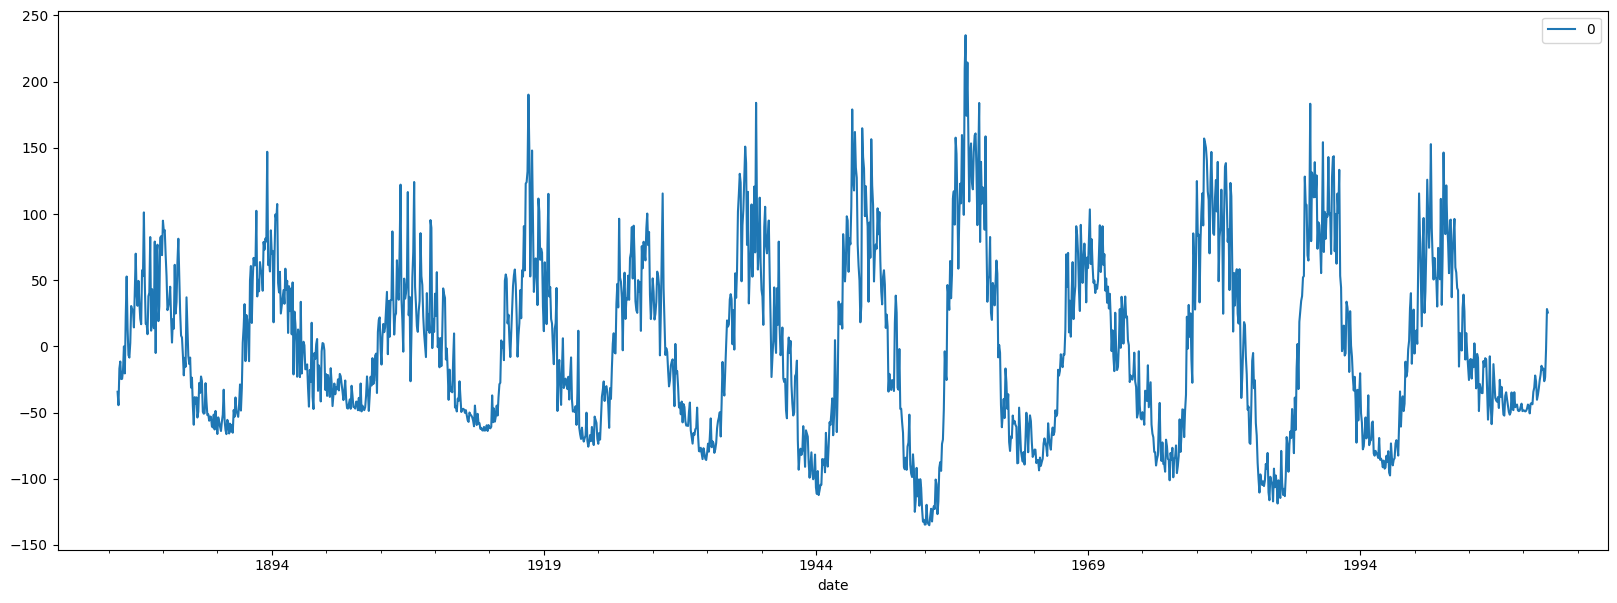

In [64]:
pd.DataFrame(result.observed-result.trend).plot()
plt.show()

# 5. Autocorrelation plot
* We can assume the distribution of each variable fits a Gaussian (bell curve) distribution. If this is the case, we can use the Pearson’s correlation coefficient to summarize the correlation between the variables.

* The Pearson’s correlation coefficient is a number between -1 and 1 that describes a negative or positive correlation respectively. A value of zero indicates no correlation.

* We can calculate the correlation for time series observations with observations with previous time steps, called lags. Because the correlation of the time series observations is calculated with values of the same series at previous times, this is called a serial correlation, or an autocorrelation.

* A plot of the autocorrelation of a time series by lag is called the AutoCorrelation Function, or the acronym ACF. This plot is sometimes called a correlogram or an autocorrelation plot.

* This helps us to find if current value depends on previous values. In the plot you can observe that current value is dependent on previous 120-130 values. This can be around 10/11 years as it is monthly data.

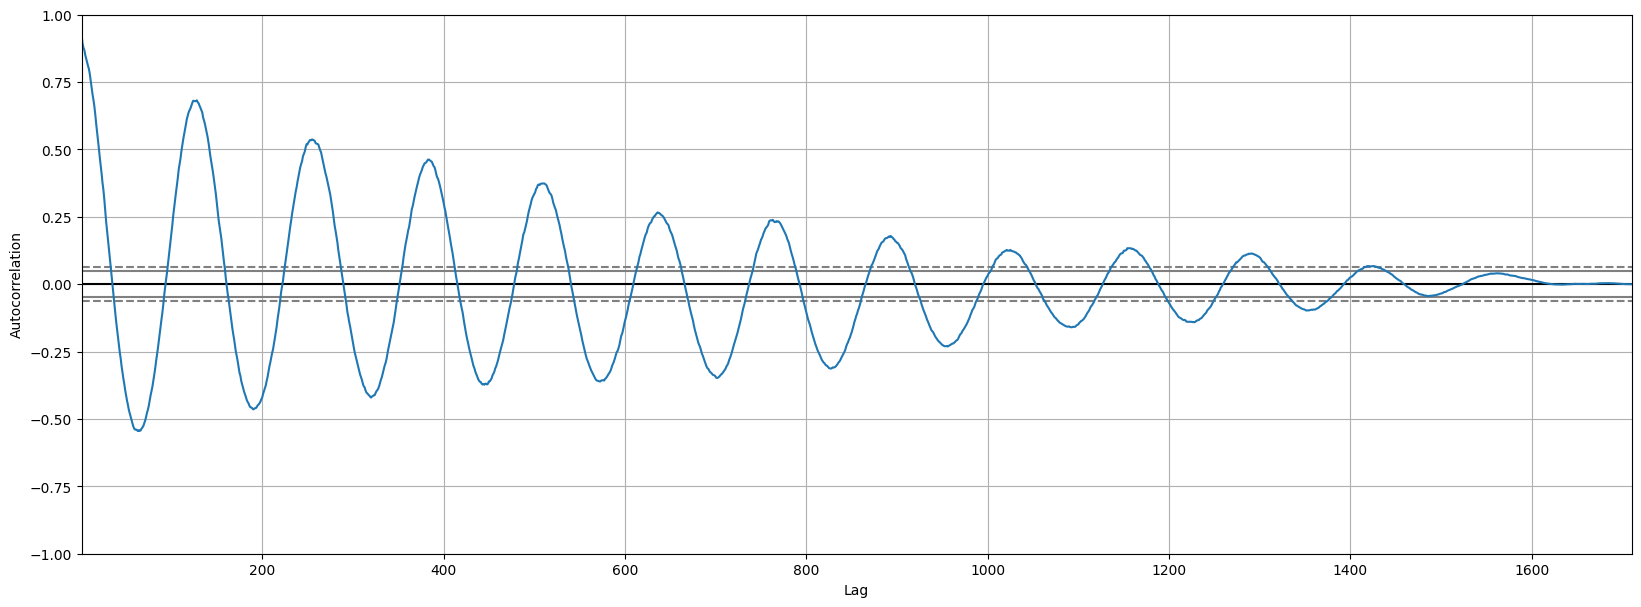

In [65]:
pd.plotting.autocorrelation_plot(df['count']) ## for each month
plt.show()

In [66]:
df['count'].resample("1y").mean() ## Resample based on 1 year

date
1874-12-31     69.382258
1875-12-31     28.423758
1876-12-31     18.860509
1877-12-31     20.661559
1878-12-31      5.754231
                 ...    
2012-12-31     84.397089
2013-12-31     93.691270
2014-12-31    113.597261
2015-12-31     69.800205
2016-12-31     43.792985
Freq: A-DEC, Name: count, Length: 143, dtype: float64

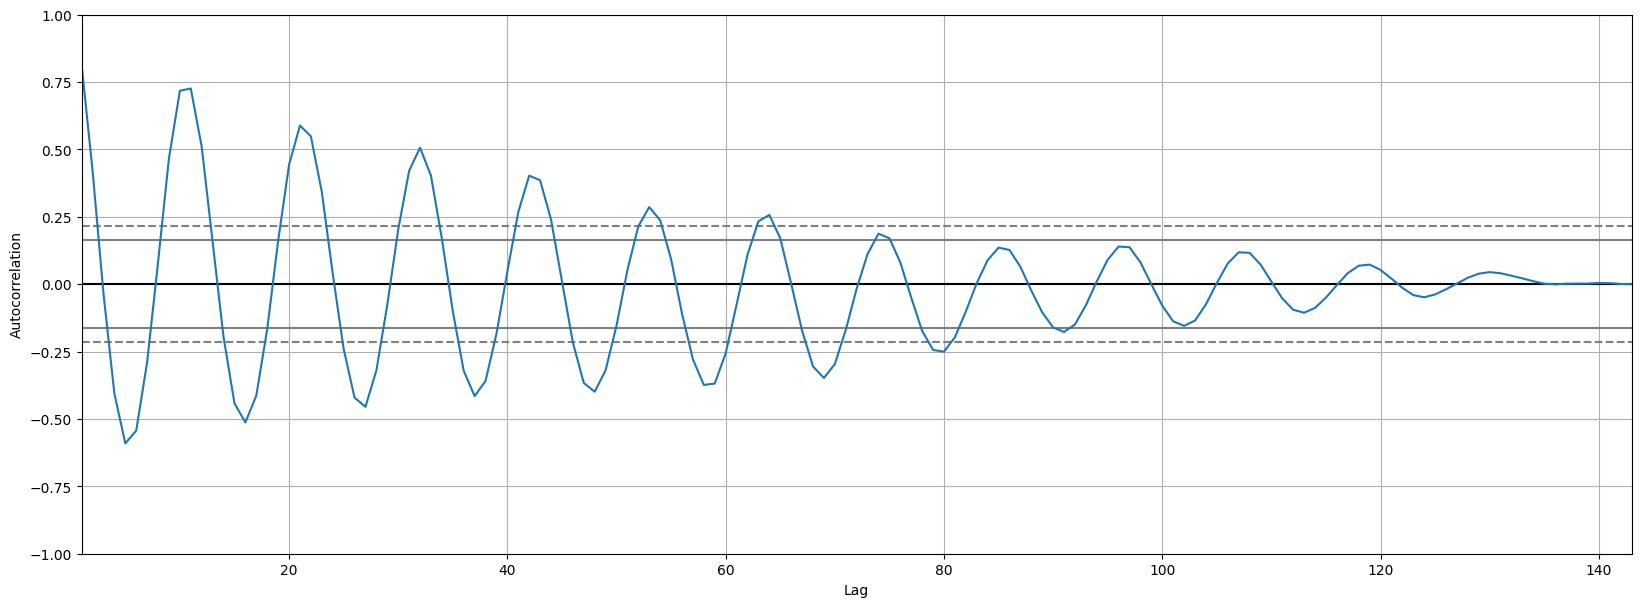

In [67]:
pd.plotting.autocorrelation_plot(df['count'].resample("1y").mean())
plt.show()

# ACF and PACF plots:
* Running the example creates a 2D plot showing the lag value along the x-axis and the correlation on the y-axis between -1 and 1.

* Confidence intervals are drawn as a cone. By default, this is set to a 95% confidence interval, suggesting that correlation values outside of this code are very likely a correlation and not a statistical fluke.

* acf: By looking at the plot we can improvise our understanding from above plot and say that present value depends on previous 25-30 values.

* pacf plot further says that present value depends only on previous 5/6 values. All these plots help us narrow down thinking and make our model efficient.

In [68]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

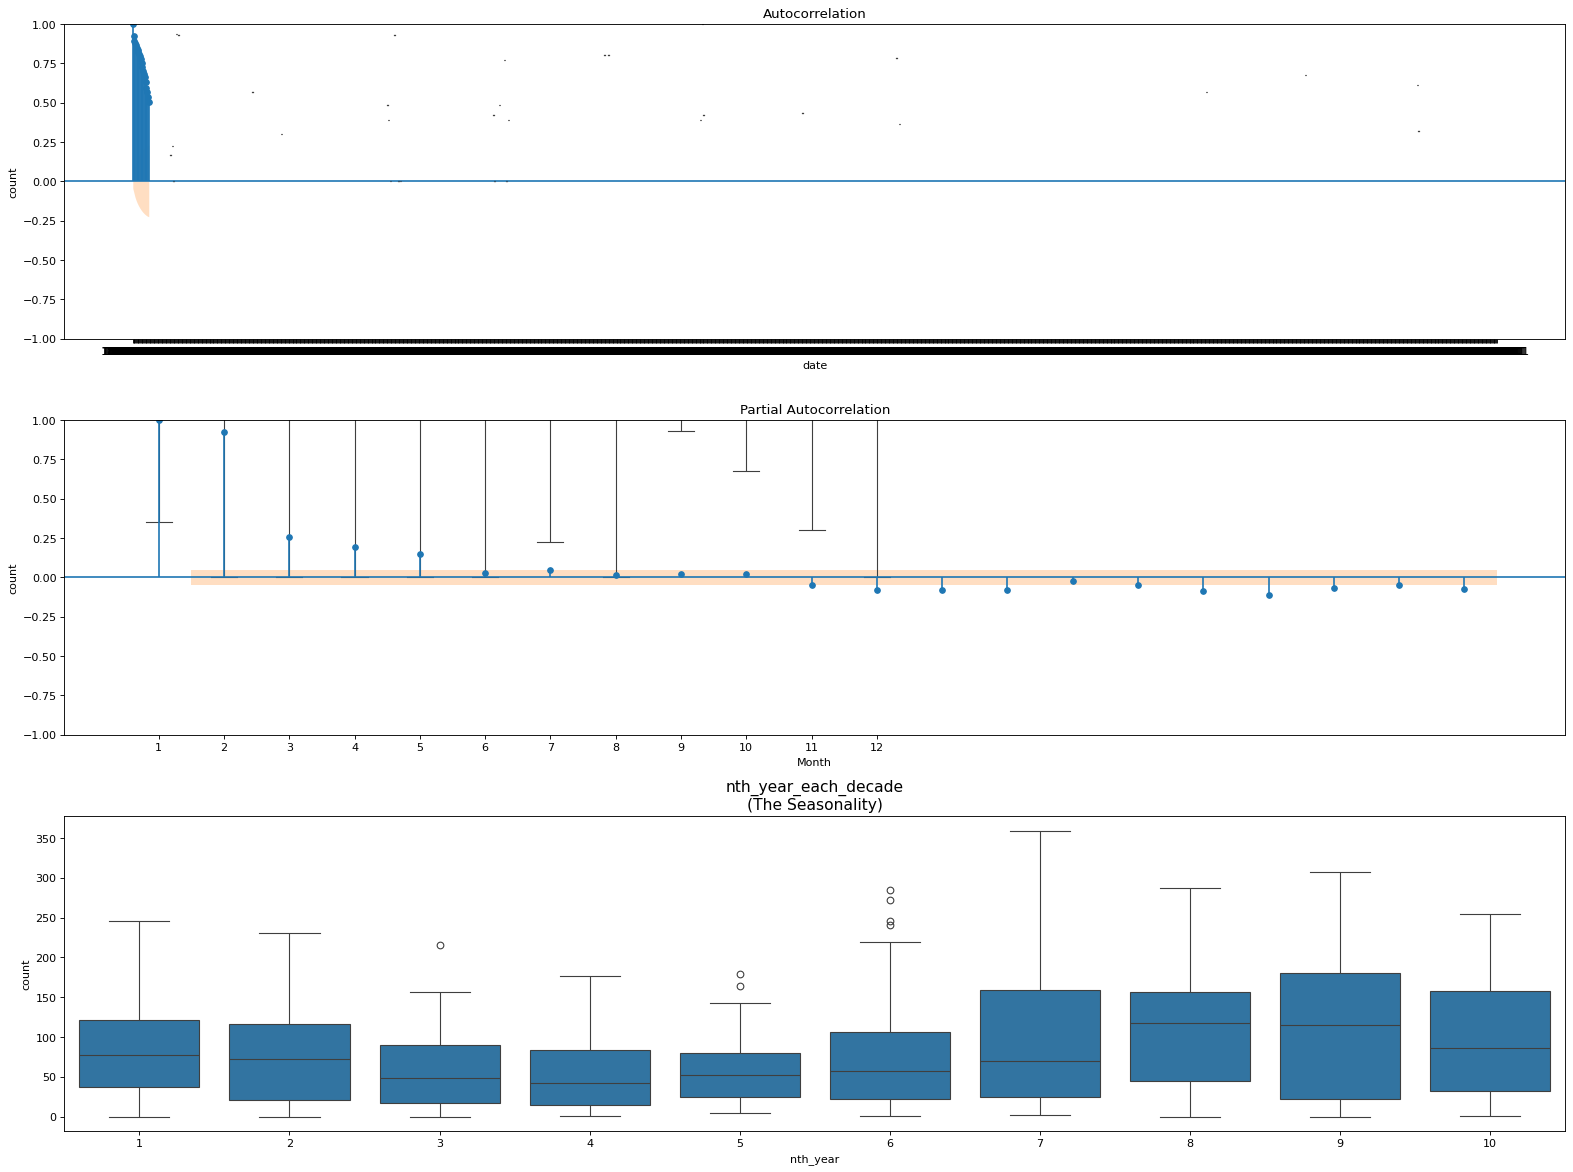

In [69]:
# Draw Plot
plot_acf(df['count'].tolist(), lags=20, ax=axes[0])
plot_pacf(df['count'].tolist(), lags=20, ax=axes[1])

# Auto ARIMA

In [118]:
df_yearly = df.groupby(df['date'].dt.year)['count'].mean().reset_index().dropna()

In [119]:
df_yearly

date       count
0    1874   69.382258
1    1875   28.423758
2    1876   18.860509
3    1877   20.661559
4    1878    5.754231
..    ...         ...
138  2012   84.397089
139  2013   93.691270
140  2014  113.597261
141  2015   69.800205
142  2016   43.792985

[143 rows x 2 columns]

In [121]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split

model = pm.auto_arima(df_yearly["count"], 
                        m=11, seasonal=True,
                      start_p=0, start_q=0, max_order=4, test='adf',error_action='ignore',  
                           suppress_warnings=True,
                      stepwise=True, trace=True) 
 ## actually we have to set m=11*12,but it take too much time and it doesnt matter much. Source Given below:
 # https://robjhyndman.com/hyndsight/longseasonality/


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[11] intercept   : AIC=1487.278, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[11] intercept   : AIC=1598.034, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[11] intercept   : AIC=1376.591, Time=0.19 sec
 ARIMA(0,0,1)(0,0,1)[11] intercept   : AIC=1432.694, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[11]             : AIC=1736.964, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[11] intercept   : AIC=1446.047, Time=0.04 sec
 ARIMA(1,0,0)(2,0,0)[11] intercept   : AIC=1375.797, Time=0.67 sec
 ARIMA(1,0,0)(2,0,1)[11] intercept   : AIC=inf, Time=0.92 sec
 ARIMA(1,0,0)(1,0,1)[11] intercept   : AIC=1375.205, Time=0.21 sec
 ARIMA(1,0,0)(0,0,1)[11] intercept   : AIC=1400.287, Time=0.12 sec
 ARIMA(1,0,0)(1,0,2)[11] intercept   : AIC=1377.166, Time=0.75 sec
 ARIMA(1,0,0)(0,0,2)[11] intercept   : AIC=1391.102, Time=0.41 sec


KeyboardInterrupt: 

In [71]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1710
Model:               SARIMAX(3, 0, 2)   Log Likelihood               -7834.898
Date:                Tue, 28 May 2024   AIC                          15683.797
Time:                        12:08:17   BIC                          15721.906
Sample:                    05-01-1874   HQIC                         15697.901
                         - 10-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1341      0.024      5.643      0.000       0.088       0.181
ar.L1          2.2905      0.029     79.803      0.000       2.234       2.347
ar.L2         -1.6012      0.057    -28.069      0.000      -1.713      -1.489
ar.L3          0.3091      0.029     10.809      0.000       0.253       0.365
ma.L1         -1.7999      0.017   -105.046      0.000      -1.833      -1.766
ma.L2          0.8166      0.017     47.587      0.000       0.783       0.850
sigma2       568.4617     15.296     37.163      0.000     538.481     598.442
===================================================================================
Ljung-Box (L1) (Q):                   3.65   Jarque-Bera (JB):               298.27
Prob(Q):                              0.06   Prob(JB):                         0.00
Heteroskedasticity (H):               1.05   Skew:                             0.51
Prob(H) (two-sided):                  0.55   Kurtosis:                         4.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Split tha data into train and test set

In [91]:
df.reset_index(inplace=True)

In [92]:
df.head()

index       date       count
0      0 1874-05-01   74.580645
1      1 1874-06-01   63.766667
2      2 1874-07-01  113.225806
3      3 1874-08-01  102.258065
4      4 1874-09-01   46.833333

In [96]:
df.iloc[int(len(df)*0.7)]

index                   1197
date     1974-02-01 00:00:00
count                  37.25
Name: 1197, dtype: object

In [97]:
train=df[(df.date.dt.year<1974)]
test=df[(df.date.dt.year>=1974)]

In [100]:
(df.date.dt.year>=1974) & (df.date.dt.year<1984)

0       False
1       False
2       False
3       False
4       False
        ...  
1705    False
1706    False
1707    False
1708    False
1709    False
Name: date, Length: 1710, dtype: bool

In [101]:
test1=df[(df.date.dt.year>=1974) & (df.date.dt.year<1984)]
n=len(test1)

In [102]:
n

120

In [103]:
model.fit(train['count'])


ARIMA(order=(3, 0, 2), scoring_args={}, seasonal_order=(0, 0, 0, 11),
      suppress_warnings=True)

In [108]:
preds, conf_int=model.predict(n_periods=n, return_conf_int=True)

In [109]:
np.sqrt(mean_squared_error(test, preds))

NameError: name 'mean_squared_error' is not defined

In [105]:
forecast_df = pd.DataFrame(forecast[0],index = test1.index,columns=['Prediction'])

<Axes: >

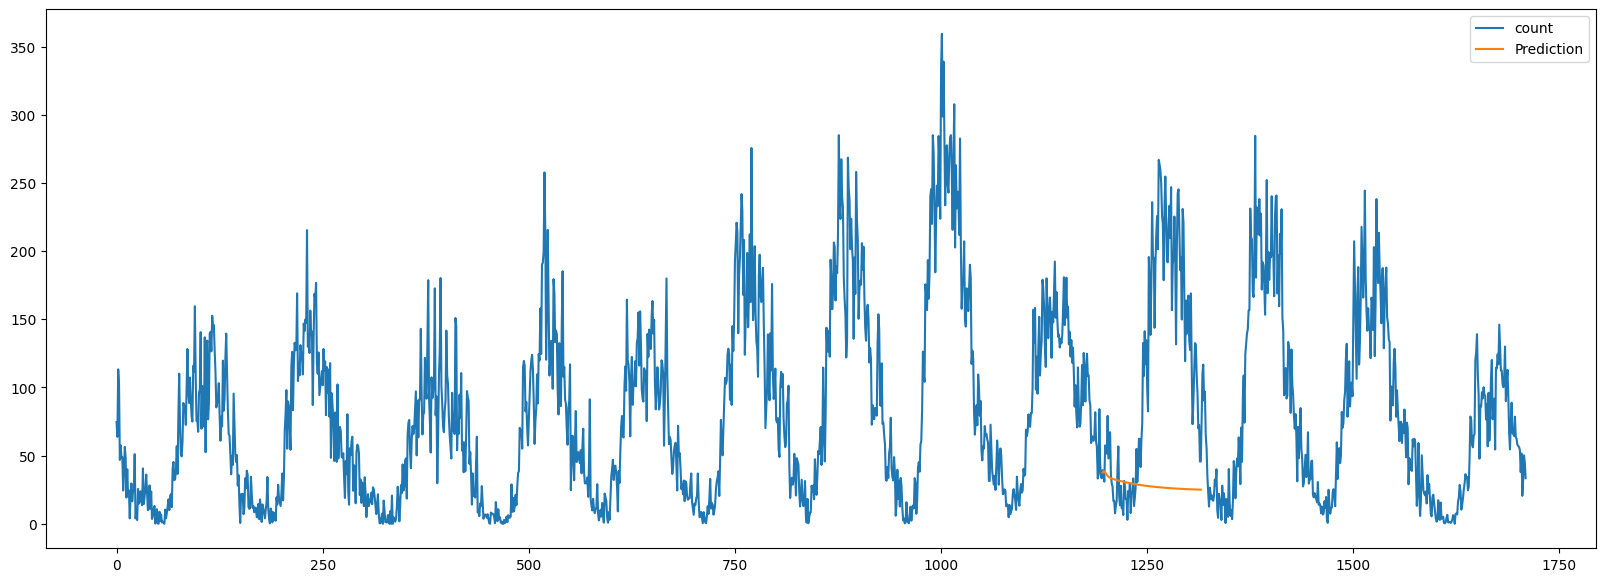

In [106]:
pd.concat([df['count'],forecast_df],axis=1).plot()

**The result may not seem accurate but, note that time series forecasting is not reasonable for many time step ahead. It may be valid only for 1,2 or few more time step ahead in future.**